In [1]:
import os
import pandas as pd
import re
from PIL import Image
os.chdir(path="c:\\Users\\lenovo\\Desktop\\HKUSTGZ-PG\\Course-project\\DSAA-5002\\Final-Project\\")

## Load the data directory in the data file

In [2]:
file_path = "./Data/Q2/train_data/"
files = os.listdir(file_path)

In [3]:
files

['Cloudy1.jpg',
 'Cloudy10.jpg',
 'Cloudy11.jpg',
 'Cloudy12.jpg',
 'Cloudy13.jpg',
 'Cloudy14.jpg',
 'Cloudy15.jpg',
 'Cloudy16.jpg',
 'Cloudy17.jpg',
 'Cloudy18.jpg',
 'Cloudy19.jpg',
 'Cloudy2.jpg',
 'Cloudy20.jpg',
 'Cloudy21.jpg',
 'Cloudy22.jpg',
 'Cloudy23.jpg',
 'Cloudy24.jpg',
 'Cloudy25.jpg',
 'Cloudy26.jpg',
 'Cloudy27.jpg',
 'Cloudy28.jpg',
 'Cloudy29.jpg',
 'Cloudy3.jpg',
 'Cloudy30.jpg',
 'Cloudy31.jpg',
 'Cloudy32.jpg',
 'Cloudy33.jpg',
 'Cloudy34.jpg',
 'Cloudy35.jpg',
 'Cloudy36.jpg',
 'Cloudy37.jpg',
 'Cloudy38.jpg',
 'Cloudy39.jpg',
 'Cloudy4.jpg',
 'Cloudy40.jpg',
 'Cloudy41.jpg',
 'Cloudy42.jpg',
 'Cloudy43.jpg',
 'Cloudy44.jpg',
 'Cloudy45.jpg',
 'Cloudy46.jpg',
 'Cloudy47.jpg',
 'Cloudy48.jpg',
 'Cloudy49.jpg',
 'Cloudy5.jpg',
 'Cloudy50.jpg',
 'Cloudy6.jpg',
 'Cloudy7.jpg',
 'Cloudy8.jpg',
 'Cloudy9.jpg',
 'Foggy1.jpg',
 'Foggy10.jpg',
 'Foggy11.jpg',
 'Foggy12.jpg',
 'Foggy13.jpg',
 'Foggy14.jpg',
 'Foggy15.jpg',
 'Foggy16.jpg',
 'Foggy17.jpg',
 'Foggy18.jpg',


## Display an Image for fun

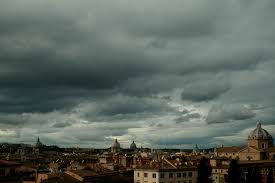

In [4]:
image = Image.open(file_path + files[5]).convert('RGB')
display(image)

## Extract the label with the corresponding Images
**we can find the file name consists of two parts:**
- Weather
- id

In [5]:
labels = []
for file in files:
    label = re.split(r"\d+", file)[0]
    labels.append(label)

In [6]:
pd.DataFrame(labels).value_counts()

Cloudy    50
Foggy     50
Rainy     50
Snowy     50
Sunny     50
dtype: int64

In [7]:
data = pd.DataFrame({
    "file": files
})
data

,file
0,Cloudy1.jpg
1,Cloudy10.jpg
2,Cloudy11.jpg
3,Cloudy12.jpg
4,Cloudy13.jpg
...,...
245,Sunny50.jpg
246,Sunny6.jpg
247,Sunny7.jpg
248,Sunny8.jpg


In [8]:
label = pd.get_dummies(labels, dtype=int)

In [9]:
label["file"] = files

In [10]:
label

,Cloudy,Foggy,Rainy,Snowy,Sunny,file
0,1,0,0,0,0,Cloudy1.jpg
1,1,0,0,0,0,Cloudy10.jpg
2,1,0,0,0,0,Cloudy11.jpg
3,1,0,0,0,0,Cloudy12.jpg
4,1,0,0,0,0,Cloudy13.jpg
...,...,...,...,...,...,...
245,0,0,0,0,1,Sunny50.jpg
246,0,0,0,0,1,Sunny6.jpg
247,0,0,0,0,1,Sunny7.jpg
248,0,0,0,0,1,Sunny8.jpg


In [11]:
import torchvision.models as pretrain_model
model = pretrain_model.resnet34()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  